In [2]:
import pandas as pd

# Load the Excel file
file_path = 'test.xlsx'
data = pd.read_excel(file_path)

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the Excel file
file_path = 'test.xlsx'  
data = pd.read_excel(file_path)
# Convert non-string entries to strings
data['Text'] = data['Text'].fillna('').astype(str)
# Encode the text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(data['Text'])
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Type'])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
# Predict on the training set
y_train_pred = model.predict(X_train)

# Display predictions (optional)
print("Training predictions:", y_train_pred)


Training predictions: [2 2 0 0 1 2 2 2 1 1 2 2 2 0 1 0 2 2 2 2 2 2 0 2 1 2 2 2 0 0 2 0 2 2 2 0 2
 2 1 1 1 0 0 0 2 2 2 0 2 1 0 0 0 0 2 0 2 1 0 2 0 2 1 0 0 0 1 1 0 2 0 0 0 2
 0 1 1 2 2 2 1 1 1 0 1 1 0 2 2 2 0 0 1 1 0 2 2 1 0 2 0 2 0 0 1 1 2 0 2 2 1
 2 0 2 2 2 2 2 1 1 2 2 0 1 2 0 2 2 0 1 0 0 2 2 2 1 0 0 2 0 0 2 1 2 0 0 1 1
 2 1 2 2 1 2 2 2 0 0 2 0 1 2 0 0 0 1 2 0 0 0 2 2 2 2 2 1 1 0 0 1 0 0 0 1 2
 0 2 2 0 1 2 2 2 0 1 2 2 0 0 2 2 2 2 0 1 1 0 1 1 0 0 1 2 1 2 1 2 2 1 1 2 1
 2 1 2 0 1 2 2 1 1 1 0 2 2 0 0 2 2 0 2 0 1 2 0 1 2 1 0 2 0 2 2 1 0 1 2 1 2
 0 1 0 0 0 0 0 2 2 2 2 2 1 1 2 0 2 0 2 2 2 0 0 1 1 1 2 0 1 1 2 0 1 2 0 2 2
 2 2 0 2 2 2 2 2 2 1 1 1 0 2 2 2 0 0 0 2 2 1 2 2 0 2 1 1 1 0 0 2 2 0 0 0 2
 0 2 1 0 2 1 2 0 1 1 0 1 2 0 2 1 2 0 2 0 2 1 2 2 1 2 2 2 1 0 2 1 2 2 1 2 1
 2 2 0 2 0 2 2 2 2 1 0 0 2 0 2 0 2 2 0 0 0 2 1 0 0 0 1 2 0 0 2 0 1 1 2 2 2
 2 0 2 2 0 1 2 2 1 0 2 2 0 2 0 1 2 2 2 1 0 2 2 2 0 0 0 1 0 1 2 2 2 2 1 2 2
 2 0 2 0 0 2 0 1 2 2 2 2 1 2 1 2 1 0 2 2 2 1 2 0 0 2 2 0 2 1 2 0 2 2 2 1 2
 2 

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.7445255474452555
Precision: 0.7630090390502584
Recall: 0.7445255474452555
F1 Score: 0.7421170069557016


In [5]:
from sklearn.cluster import KMeans

# Perform K-Means clustering (ignore the target variable)
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train)

# Cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_


In [6]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans

# Perform KMeans clustering with explicit n_init parameter
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42).fit(X_train)

# Get the labels from the clustering
labels = kmeans.labels_

# Convert sparse matrix to dense for metric calculations
X_train_dense = X_train.toarray()

# Calculate clustering evaluation metrics
silhouette = silhouette_score(X_train_dense, labels)
calinski_harabasz = calinski_harabasz_score(X_train_dense, labels)
davies_bouldin = davies_bouldin_score(X_train_dense, labels)

print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")
print(f"Davies-Bouldin Score: {davies_bouldin}")


Silhouette Score: 0.09876611201483569
Calinski-Harabasz Score: 41.91578503991779
Davies-Bouldin Score: 1.370408586760802


In [7]:
# Evaluate different values of k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X_train)
    silhouette = silhouette_score(X_train, kmeans.labels_)
    print(f"Silhouette Score for k={k}: {silhouette}")


Silhouette Score for k=2: 0.10065848052909813
Silhouette Score for k=3: 0.11428121675054968
Silhouette Score for k=4: 0.10379011525698047
Silhouette Score for k=5: 0.11454343359879682
Silhouette Score for k=6: 0.11298435868360764
Silhouette Score for k=7: 0.10996903309981101
Silhouette Score for k=8: 0.11824424760729677
Silhouette Score for k=9: 0.12091715852935095


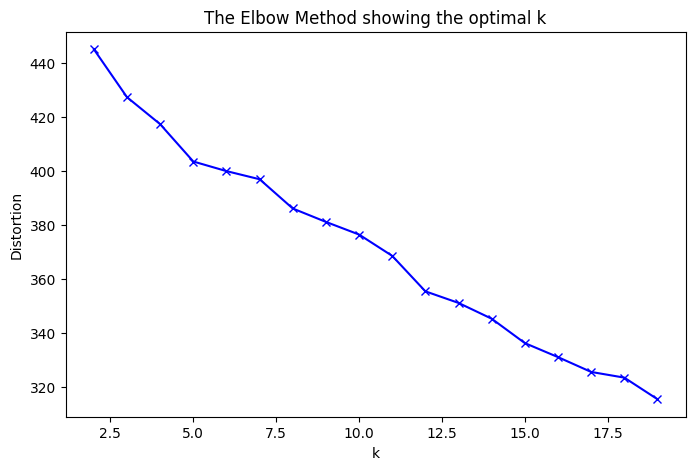

In [8]:
import matplotlib.pyplot as plt

distortions = []
K = range(2, 20)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X_train)
    distortions.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
